# Supervised Machine Learning Models - REGRESSION PROBLEM - Stored grain DML Predictions

## 2. The Machine Learning Process

In [1]:
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from joblib import dump



In [2]:
np.random.seed(42)


# To change scientific numbers to float (doesnt deal with the model)
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

# view all the dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# remove warnings   
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [3]:
# Used to plot confusion matrix
def plot_obs_pred(Y_test, y_test_pred, curr_model, save=False):
    plt.plot(Y_test, label='Observed', marker='o')
    plt.plot(y_test_pred, label='Predicted', marker='x')
    plt.ylabel('DML')
    plt.xlabel('Data points')
    plt.title(f'Observed vs Predicted {curr_model}')
    plt.legend()
    if save==True:
        plt.savefig(f'Confusion matrix {curr_model}')
    plt.show()

## 3. Loading & Investigating the raw data

In [4]:
# loading the raw data

# raw_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//train.csv")
# evaluation_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//test.csv")
# submission_example = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//sample_submission.csv")

raw_data = pd.read_excel("U:\\Python Practice File\\machine_learning\\DML_Year1.xlsx")
raw_data
print('raw_data', raw_data.shape)
# print('evaluation_data', evaluation_data.shape)
# print('submission_example', submission_example.shape)



raw_data (1334, 14)


In [5]:
raw_data.head()

,Storage_time,Grain Bulk RH,EMC Center,Ambient Temp,Ambient RH,Headspace Temp,Headspace RH,Headspace CO2,Plenum Temp,Plenum RH,Plenum CO2,Average Grain Temp,Season_N,DML_CUM
0,1,66.211667,14.003750,19.425926,66.361667,13.541611,68.751000,514.000000,15.442889,73.427900,527.000000,16.748148,1,0.000045
1,2,66.762500,14.073583,19.671759,74.795417,14.794870,68.248137,506.583333,16.672007,77.234721,515.500000,16.663704,1,0.000089
2,3,76.268333,15.940000,4.139352,83.077500,9.203319,76.271129,491.416667,14.136183,75.022513,509.833333,8.705242,1,0.000134
3,4,68.273333,14.773583,3.494444,73.415417,-0.145738,78.544883,532.958333,8.109324,67.317100,550.652174,6.181944,1,0.000183
4,5,69.533913,14.870348,2.776620,76.479167,2.944326,69.954348,522.434783,6.571808,66.730133,549.041667,5.424098,1,0.000231


In [6]:
# Checking for null values

raw_data.isnull().sum()

Storage_time          0
Grain Bulk RH         0
EMC Center            0
Ambient Temp          0
Ambient RH            0
Headspace Temp        0
Headspace RH          0
Headspace CO2         0
Plenum Temp           0
Plenum RH             0
Plenum CO2            0
Average Grain Temp    0
Season_N              0
DML_CUM               0
dtype: int64

In [7]:
# Vizualizing the dtypes
raw_data.dtypes

Storage_time            int64
Grain Bulk RH         float64
EMC Center            float64
Ambient Temp          float64
Ambient RH            float64
Headspace Temp        float64
Headspace RH          float64
Headspace CO2         float64
Plenum Temp           float64
Plenum RH             float64
Plenum CO2            float64
Average Grain Temp    float64
Season_N                int64
DML_CUM               float64
dtype: object

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_10588\489187806.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


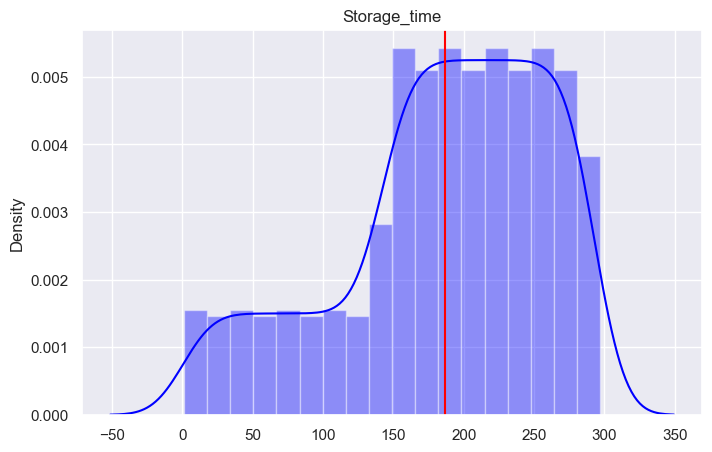

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_10588\489187806.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


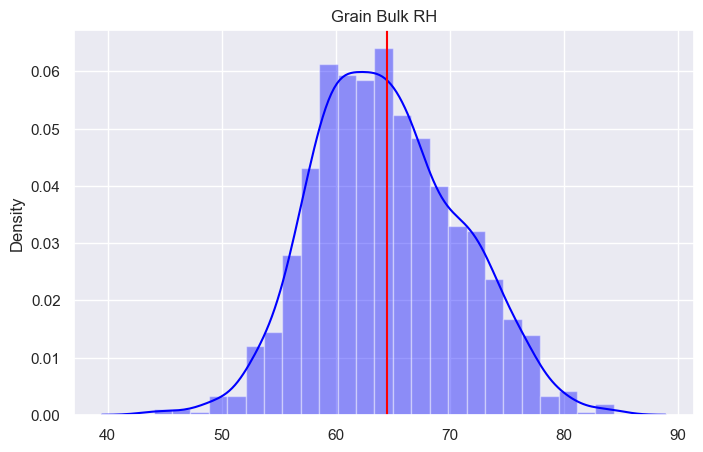

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_10588\489187806.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


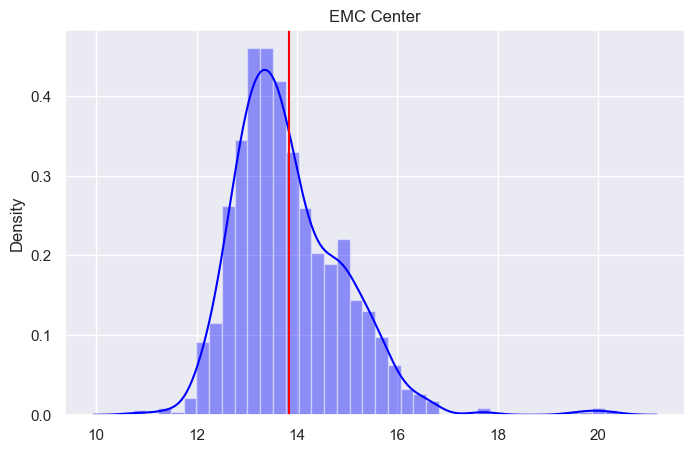

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_10588\489187806.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


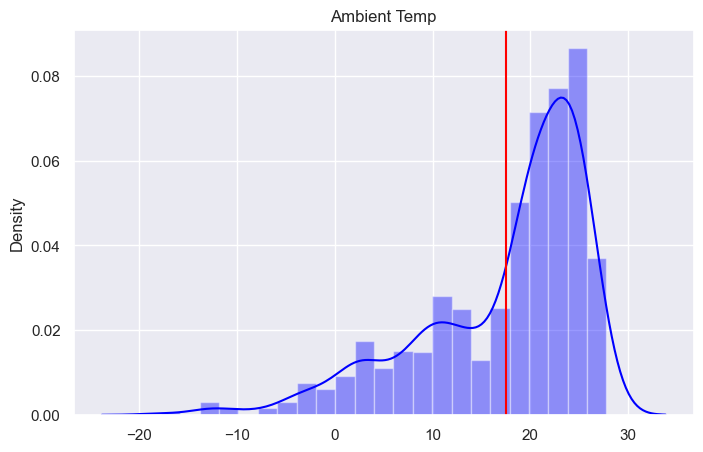

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_10588\489187806.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


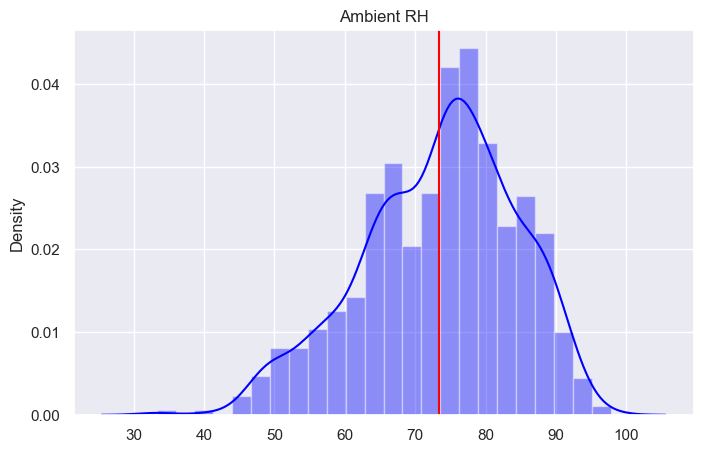

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_10588\489187806.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


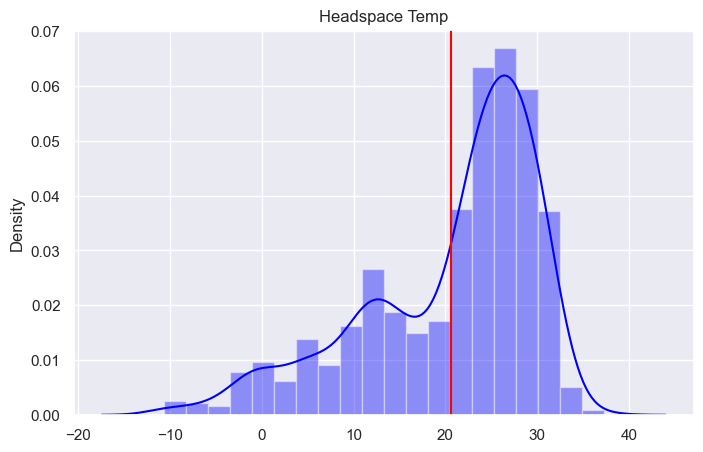

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_10588\489187806.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


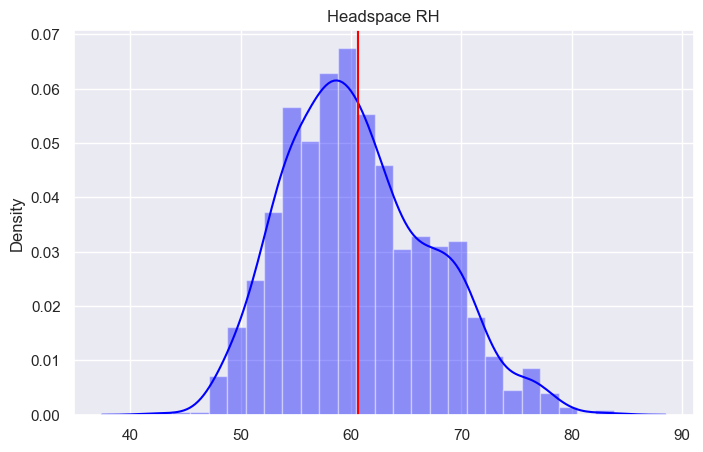

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_10588\489187806.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


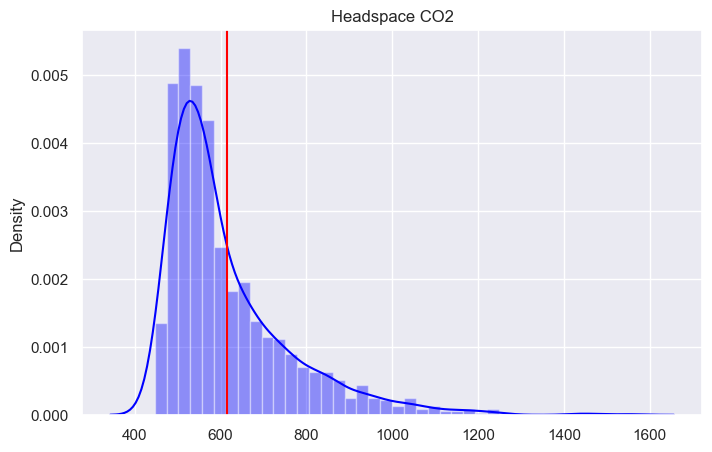

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_10588\489187806.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


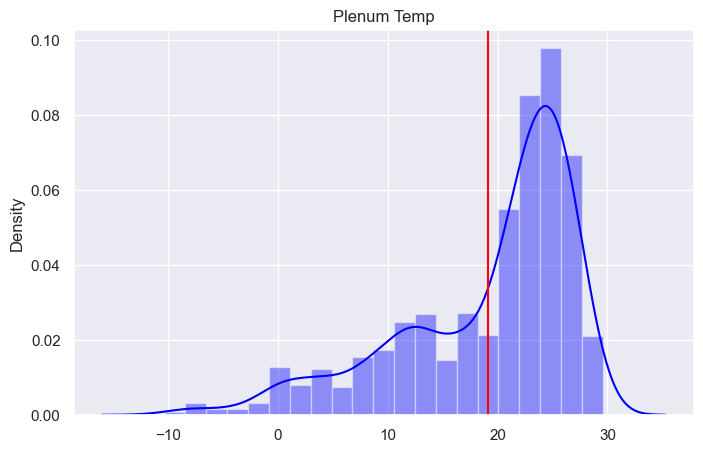

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_10588\489187806.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


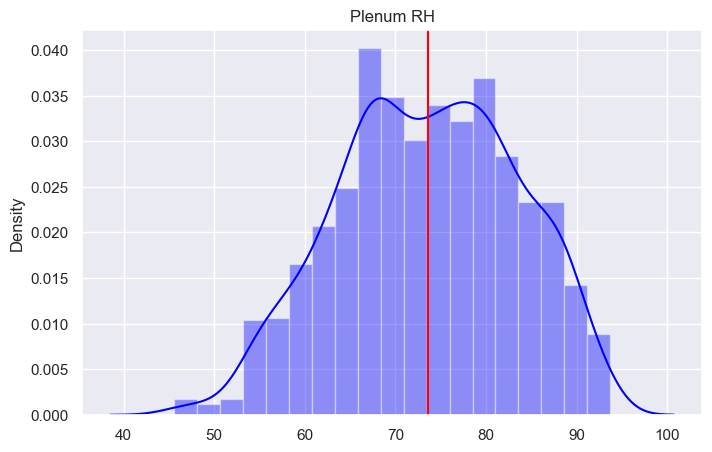

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_10588\489187806.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


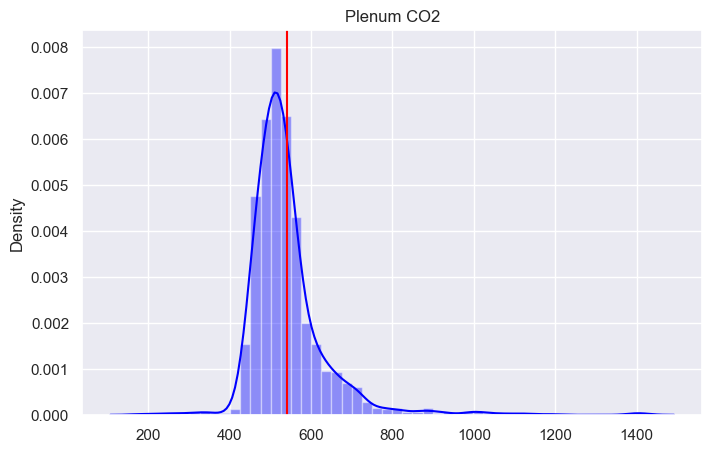

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_10588\489187806.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


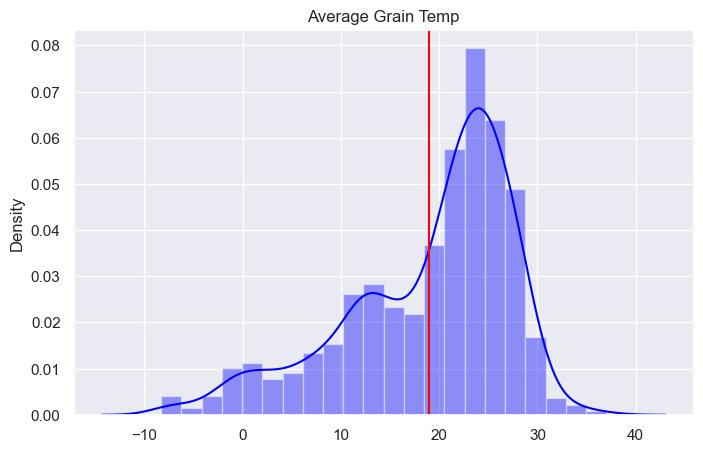

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_10588\489187806.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


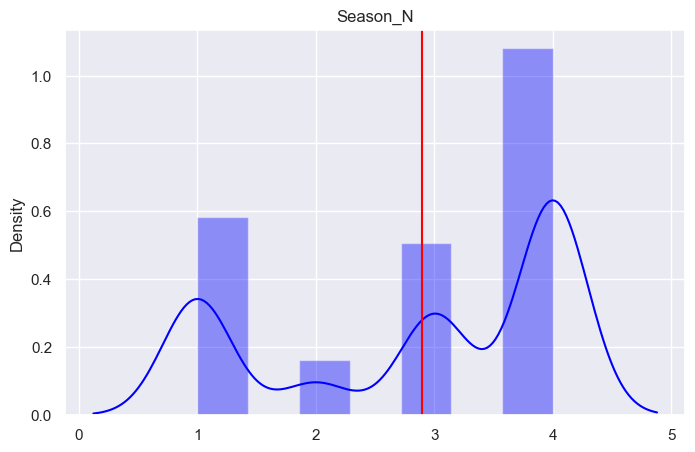

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_10588\489187806.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


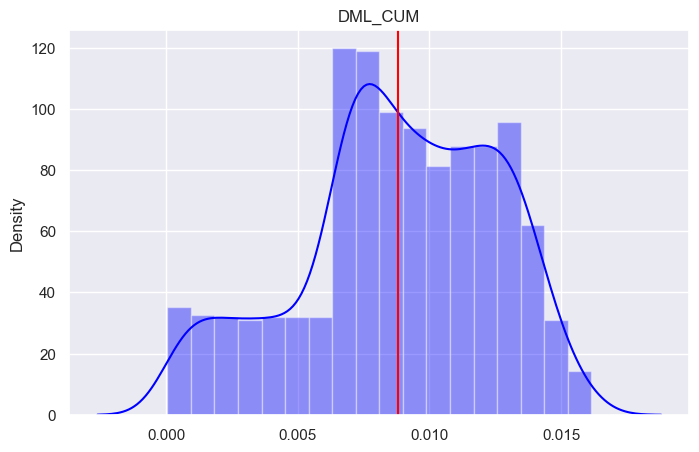

In [8]:

# for n in raw_data.columns:
#     raw_data[n][raw_data[n] == 'Unknown'] = 0
#     raw_data[n] = raw_data[n].astype(float)

# Example 8 - Investigating the distribution 
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})


for n in raw_data.columns:
    x = raw_data[n].values
    sns.distplot(x, color = 'blue');

    # Calculating the mean
    mean = raw_data[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

In [9]:
raw_data.head()

,Storage_time,Grain Bulk RH,EMC Center,Ambient Temp,Ambient RH,Headspace Temp,Headspace RH,Headspace CO2,Plenum Temp,Plenum RH,Plenum CO2,Average Grain Temp,Season_N,DML_CUM
0,1,66.211667,14.003750,19.425926,66.361667,13.541611,68.751000,514.000000,15.442889,73.427900,527.000000,16.748148,1,0.000045
1,2,66.762500,14.073583,19.671759,74.795417,14.794870,68.248137,506.583333,16.672007,77.234721,515.500000,16.663704,1,0.000089
2,3,76.268333,15.940000,4.139352,83.077500,9.203319,76.271129,491.416667,14.136183,75.022513,509.833333,8.705242,1,0.000134
3,4,68.273333,14.773583,3.494444,73.415417,-0.145738,78.544883,532.958333,8.109324,67.317100,550.652174,6.181944,1,0.000183
4,5,69.533913,14.870348,2.776620,76.479167,2.944326,69.954348,522.434783,6.571808,66.730133,549.041667,5.424098,1,0.000231


In [10]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    try:
        unique_vals = np.unique(raw_data[column])
    except:
        unique_vals = raw_data[column].unique()
        
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Storage_time :297
The number of values for feature Grain Bulk RH :1297
The number of values for feature EMC Center :1317
The number of values for feature Ambient Temp :300
The number of values for feature Ambient RH :301
The number of values for feature Headspace Temp :1330
The number of values for feature Headspace RH :1329
The number of values for feature Headspace CO2 :1274
The number of values for feature Plenum Temp :1328
The number of values for feature Plenum RH :1325
The number of values for feature Plenum CO2 :1247
The number of values for feature Average Grain Temp :1323
The number of values for feature Season_N :4 -- [1 2 3 4]
The number of values for feature DML_CUM :1334


## 4. Data Cleaning

In [11]:
raw_data

,Storage_time,Grain Bulk RH,EMC Center,Ambient Temp,Ambient RH,Headspace Temp,Headspace RH,Headspace CO2,Plenum Temp,Plenum RH,Plenum CO2,Average Grain Temp,Season_N,DML_CUM
0,1,66.211667,14.003750,19.425926,66.361667,13.541611,68.751000,514.000000,15.442889,73.427900,527.000000,16.748148,1,0.000045
1,2,66.762500,14.073583,19.671759,74.795417,14.794870,68.248137,506.583333,16.672007,77.234721,515.500000,16.663704,1,0.000089
2,3,76.268333,15.940000,4.139352,83.077500,9.203319,76.271129,491.416667,14.136183,75.022513,509.833333,8.705242,1,0.000134
3,4,68.273333,14.773583,3.494444,73.415417,-0.145738,78.544883,532.958333,8.109324,67.317100,550.652174,6.181944,1,0.000183
4,5,69.533913,14.870348,2.776620,76.479167,2.944326,69.954348,522.434783,6.571808,66.730133,549.041667,5.424098,1,0.000231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,287,74.909167,15.358167,11.431250,88.406667,12.629896,70.753804,543.666667,12.784490,86.355730,521.739130,12.506481,1,0.013332
1330,288,74.385000,15.418500,9.195833,83.450000,11.134121,70.342304,561.260870,11.791639,84.121167,531.000000,11.501273,1,0.013382
1331,289,75.908333,15.862833,4.262963,71.333750,6.090486,71.670117,547.000000,8.966155,74.468557,520.913043,8.430324,1,0.013432
1332,290,76.727500,16.073917,3.129167,71.876667,5.644029,71.870604,534.695652,7.812843,64.901400,511.791667,7.581481,1,0.013482


## 5. Selecting the important features

#### Heatmap
- First we need to create a "Dataset" to display on a Heatmap - we will use a correlation dataset
- .corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded
- The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease


In [12]:
raw_data.columns

Index(['Storage_time', 'Grain Bulk RH', 'EMC Center', 'Ambient Temp',
       'Ambient RH', 'Headspace Temp', 'Headspace RH', 'Headspace CO2',
       'Plenum Temp', 'Plenum RH', 'Plenum CO2', 'Average Grain Temp',
       'Season_N', 'DML_CUM'],
      dtype='object')

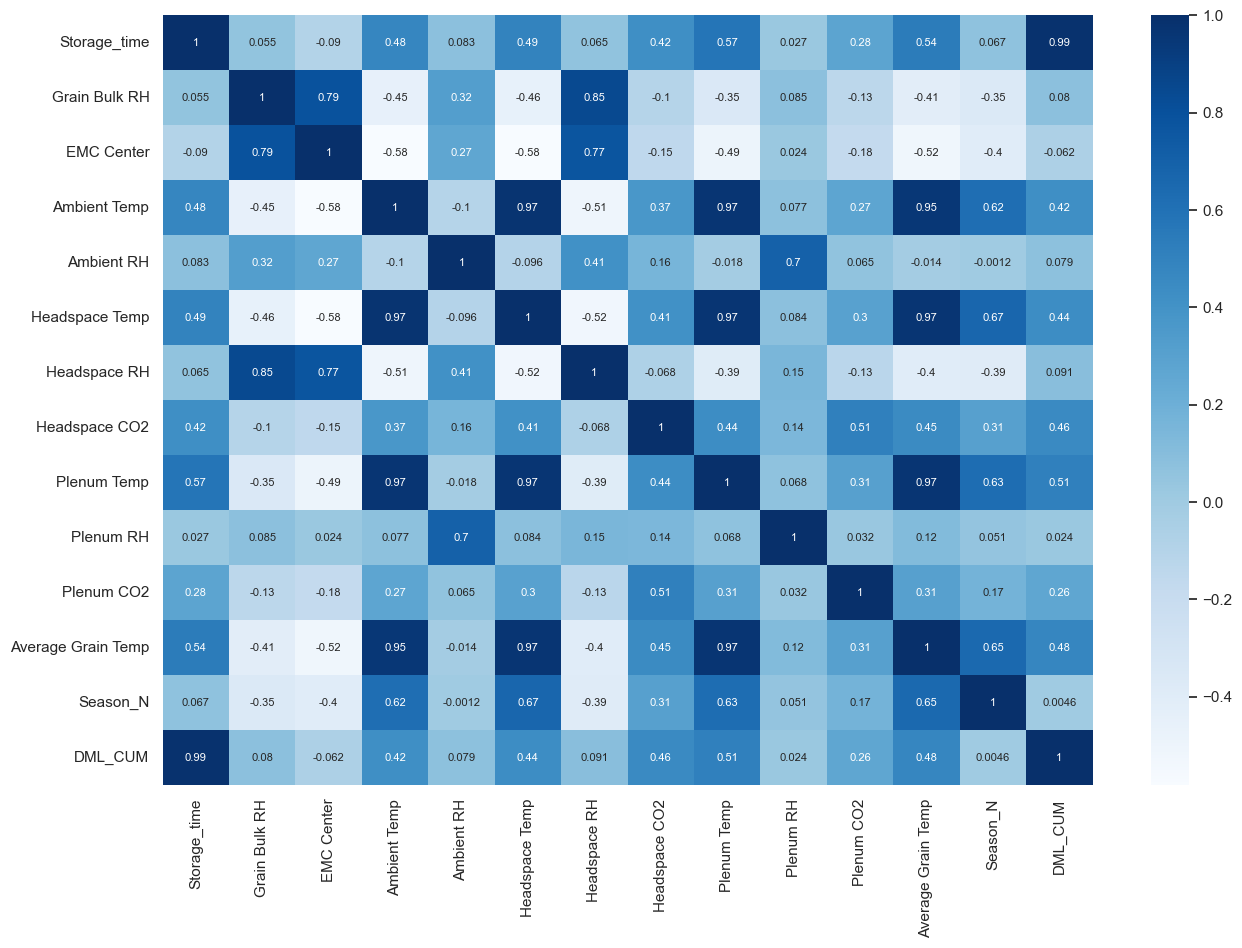

In [13]:
# droping columns we don't need
#del new_raw_data['CarName']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,10)})

n_variables = list(raw_data.columns)

pc = raw_data[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':8},
                 cmap="Blues")

### Feature Importance

Steps of Running Feature Importance

- Split the data into X & y

- Run a Tree-based estimators (i.e. decision trees & random forests)

- Run Feature Importance

- We measure the importance of a feature by calculating the increase in the model’s prediction error after permuting the feature



In [14]:

# deleting for rerun
try:
    del final_fi
except:
    print("")

# Assuming `raw_data` is your DataFrame, and `y_column` is the target column
y_column='DML_CUM'


scaler = MinMaxScaler()
# Separate features (X) and target (y)
X_dataframe= raw_data.drop([y_column], axis=1)
X_dataframe[list(X_dataframe.columns)] = scaler.fit_transform(X_dataframe[list(X_dataframe.columns)])
X = X_dataframe.values
y = raw_data[y_column].values  # Ensure y is in the correct format

# X_dataframe



print("Shape of X:", X.shape)
print("Shape of y:", y.shape)




Shape of X: (1334, 13)
Shape of y: (1334,)


In [15]:

# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(
    random_state=42, 
    criterion='squared_error',  # Criterion for regression tasks
    max_depth=10                # Limit tree depth
)

# Train the model
dt.fit(X, y)

# Feature Importance Calculation
final_fi = pd.DataFrame()  # Initialize an empty DataFrame for storing feature importance
for i, column in enumerate(raw_data.drop([y_column], axis=1).columns):
    importance = dt.feature_importances_[i]
    print(f'Importance of feature {column}: {importance:.3f}')
    
    # Append feature importance to the DataFrame
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [importance]})
    try:
        final_fi = pd.concat([final_fi, fi], ignore_index=True)
    except:
        final_fi = fi

# Ordering the feature importance data
final_fi = final_fi.sort_values('Feature Importance Score', ascending=False).reset_index(drop=True)

# Display the final feature importance DataFrame
print(final_fi)

Importance of feature Storage_time: 0.979
Importance of feature Grain Bulk RH: 0.001
Importance of feature EMC Center: 0.001
Importance of feature Ambient Temp: 0.000
Importance of feature Ambient RH: 0.000
Importance of feature Headspace Temp: 0.001
Importance of feature Headspace RH: 0.001
Importance of feature Headspace CO2: 0.007
Importance of feature Plenum Temp: 0.001
Importance of feature Plenum RH: 0.001
Importance of feature Plenum CO2: 0.007
Importance of feature Average Grain Temp: 0.000
Importance of feature Season_N: 0.001
              Variable  Feature Importance Score
0         Storage_time                  0.979211
1        Headspace CO2                  0.007203
2           Plenum CO2                  0.006506
3             Season_N                  0.001388
4        Grain Bulk RH                  0.000998
5         Headspace RH                  0.000858
6          Plenum Temp                  0.000744
7            Plenum RH                  0.000723
8       Headspace

## 5. Training & Running the regression model

In [16]:

#Spliting the data as 
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=42)


Gradient Boost algorithm 

Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5000}
Best cross-validation score: -0.00
Mean Squared Error: 0.00000
Root Mean Squared Error: 0.00040
R² Score: 0.9893


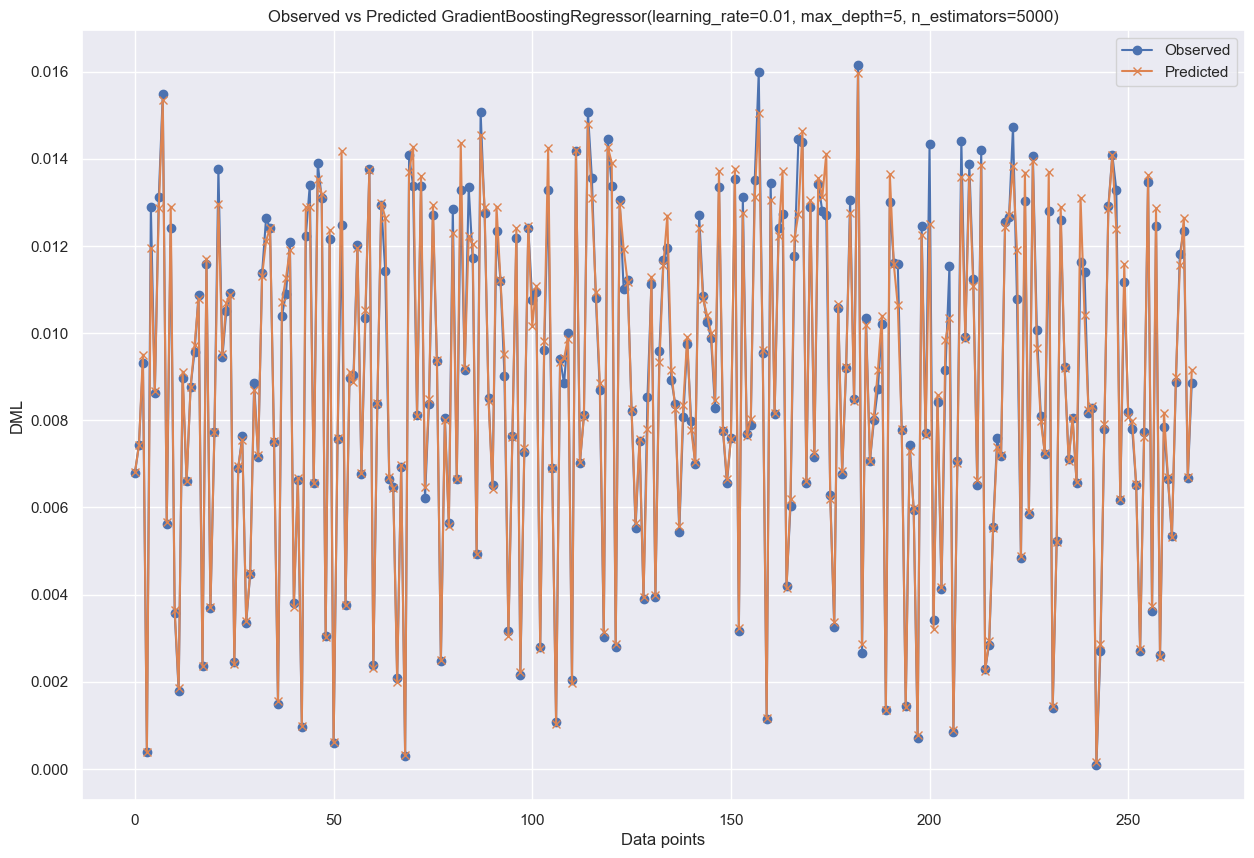

['Model_developed_GradientBoost_Regression.joblib']

In [17]:
# training and fitting the data
# ----------------------------------------------------------
#  1. GRADIENT BOOST ALGORITHM TRAINING
# ----------------------------------------------------------

#X_Validation, X_test, Y_Validation, Y_test = train_test_split(X_temp,Y_temp, test_size=0.5, random_state=0)

# Define the parameter grid (finding the hyperparamters)
param_grid = {
    'n_estimators': [ 600, 700, 800, 900, 1000, 1500, 2000, 5000],  # Number of boosting stages
    'learning_rate': [0.01, 0.002, 0.0005],  # Shrinks the contribution of each tree
    'max_depth': [3, 4, 5, 6]  # Maximum depth of the individual regression estimators
}

# Create a Gradient Boosting classifier
gbc = GradientBoostingRegressor()

# Set up GridSearchCV (Tuning of the hyperparameters)
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, Y_train) 

# Best parameters and best cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on the test set with the best parameters
gbc_best = GradientBoostingRegressor(**grid_search.best_params_)
gbc_best.fit(X_train, Y_train)
y_test_pred = gbc_best.predict(X_test)


# Evaluate the model
mse = mean_squared_error(Y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_test_pred)

print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R² Score: {r2:.4f}")


plot_obs_pred(Y_test, y_test_pred, gbc_best, save=False)

model_filename = 'Model_developed_GradientBoost_Regression.joblib'
dump(gbc_best, model_filename)

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits
Best parameters: {'bootstrap': False, 'max_depth': 15, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 135}
Best cross-validation score: 0.00
Test MSE: 0.0000
Test RMSE: 0.0005
Test R²: 0.9837


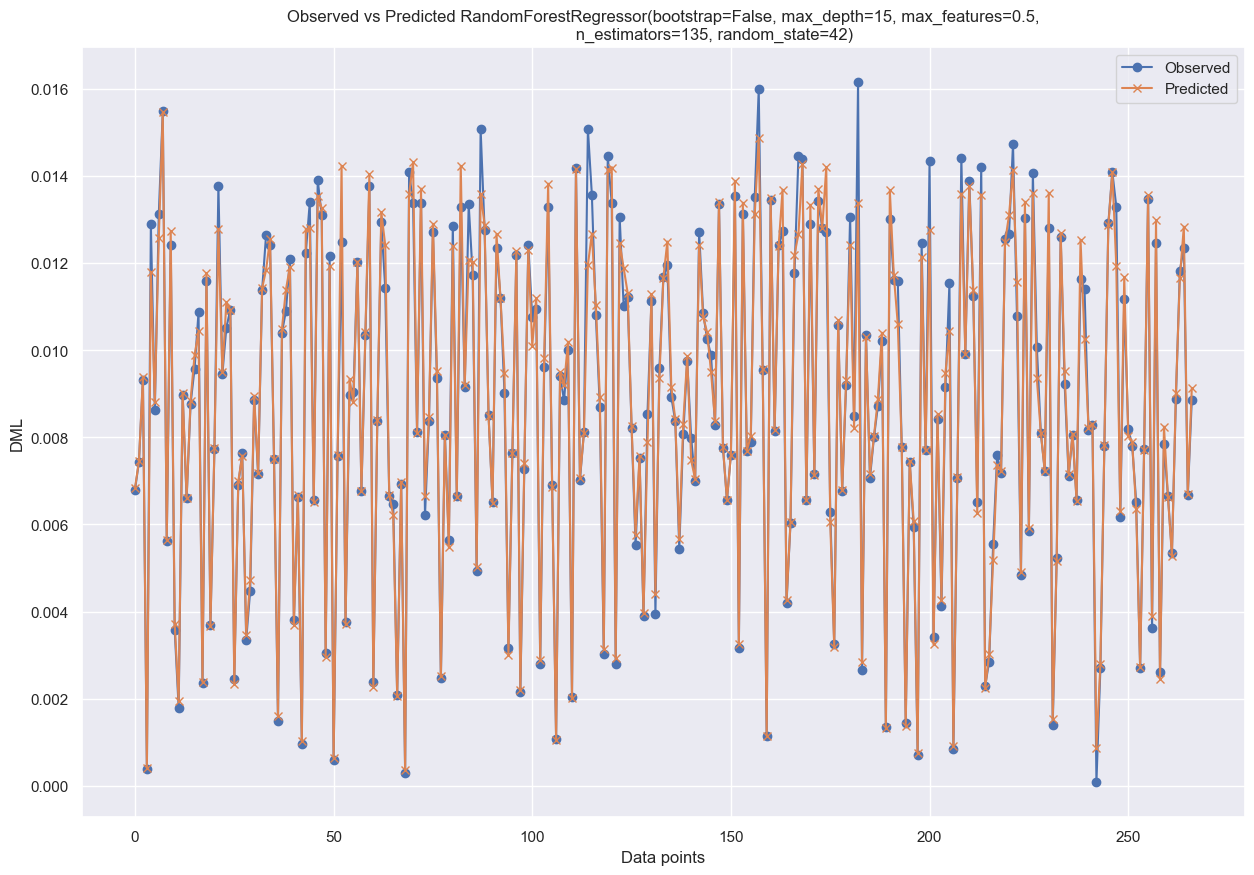

In [18]:
# training and fitting the data
# ----------------------------------------------------------
#    2. RANDOM FOREST ALGORITHM TRAINING
# ----------------------------------------------------------


# Hyperparameter grid
n_estimators = [int(x) for x in np.linspace(start=5, stop=200, num=10)]
max_features = [0.5, 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(5, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}

param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap,
}

# Initialize the RandomForestRegressor
rfc = RandomForestRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Best parameters and cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(-grid_search.best_score_))  # MSE is negative

# Evaluate on the test set with the best parameters
rfc_best = RandomForestRegressor(**grid_search.best_params_, random_state=42)
rfc_best.fit(X_train, Y_train)
y_test_pred = rfc_best.predict(X_test)

# Model evaluation
mse = mean_squared_error(Y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_test_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")


plot_obs_pred(Y_test, y_test_pred, rfc_best, save=False)
# ****************************************************************************************************
# ****************************************************************************************************
# ****************************************************************************************************


In [19]:
# # training and fitting the data
#  # train random forest training algorithm

# save the model to a file #GBC means GradientBoostingClassifier algorithm

model_filename = 'Model_developed_RandomForestRegression.joblib'
dump(rfc_best, model_filename)


['Model_developed_RandomForestRegression.joblib']

Best parameters: {'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation score: -0.00
Test MSE: 0.0000
Test RMSE: 0.0005
Test R²: 0.9824


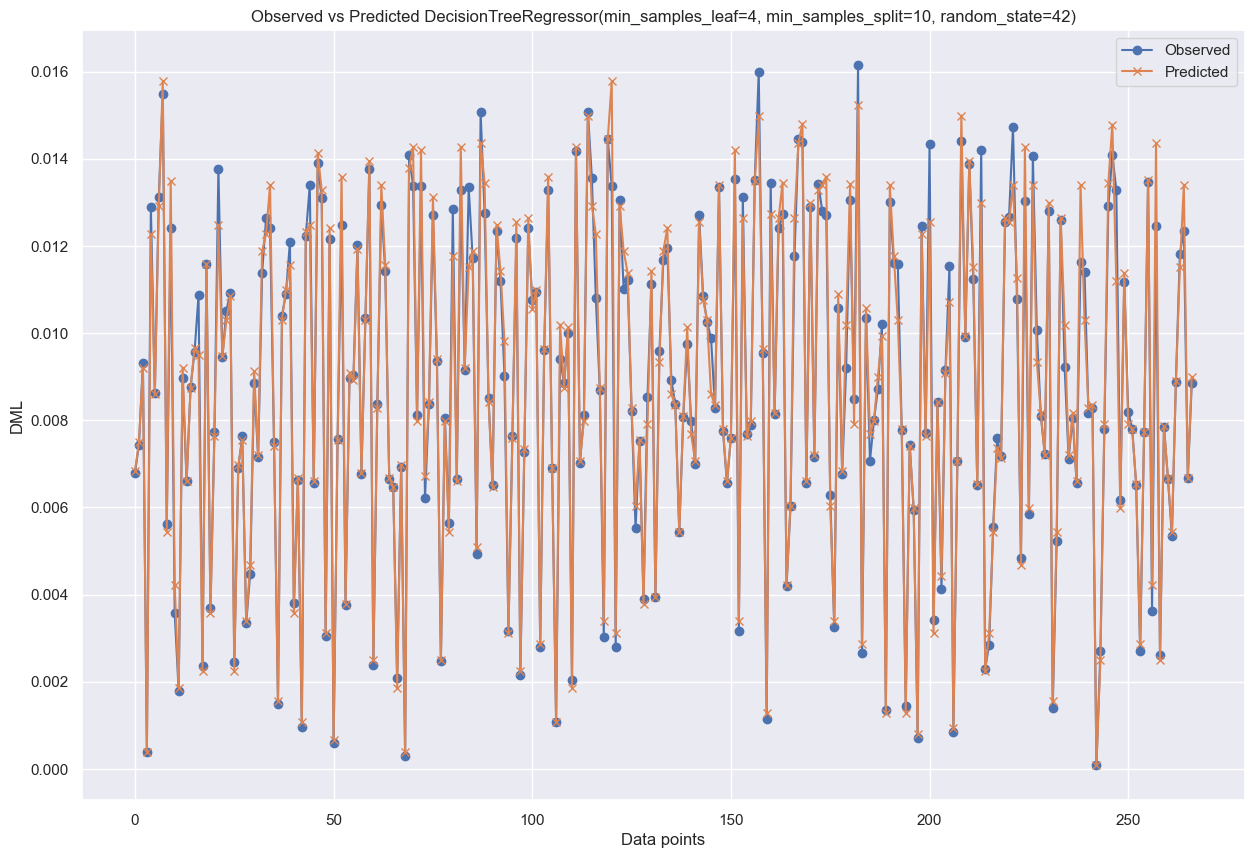

['Model_developed_Decision_TreeRegression.joblib']

In [20]:
# training and fitting the data
# ----------------------------------------------------------
#    3. DECISION TREE CLASSIFIER ALGORITHM TRAINING
# ----------------------------------------------------------

# Define the parameter grid
param_grid = {
'max_depth': [None, 10, 20, 30, 40], # Maximum depth of the tree
'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
'min_samples_leaf': [1, 2, 4], # Minimum number of samples required at a leaf node
'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'] # Function to measure the quality of a split
}

# Create a Decision Tree classifier
dt = DecisionTreeRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Best parameters and best cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on the test set with the best parameters
dt_best = DecisionTreeRegressor(**grid_search.best_params_, random_state=42)
dt_best.fit(X_train, Y_train)
y_test_pred = dt_best.predict(X_test)


# Model evaluation
mse = mean_squared_error(Y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_test_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")


plot_obs_pred(Y_test, y_test_pred, dt_best, save=False)

model_filename = 'Model_developed_Decision_TreeRegression.joblib'
dump(dt_best, model_filename)



Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: -0.04
Test MSE: 0.0000
Test RMSE: 0.0039
Test R²: -0.0309


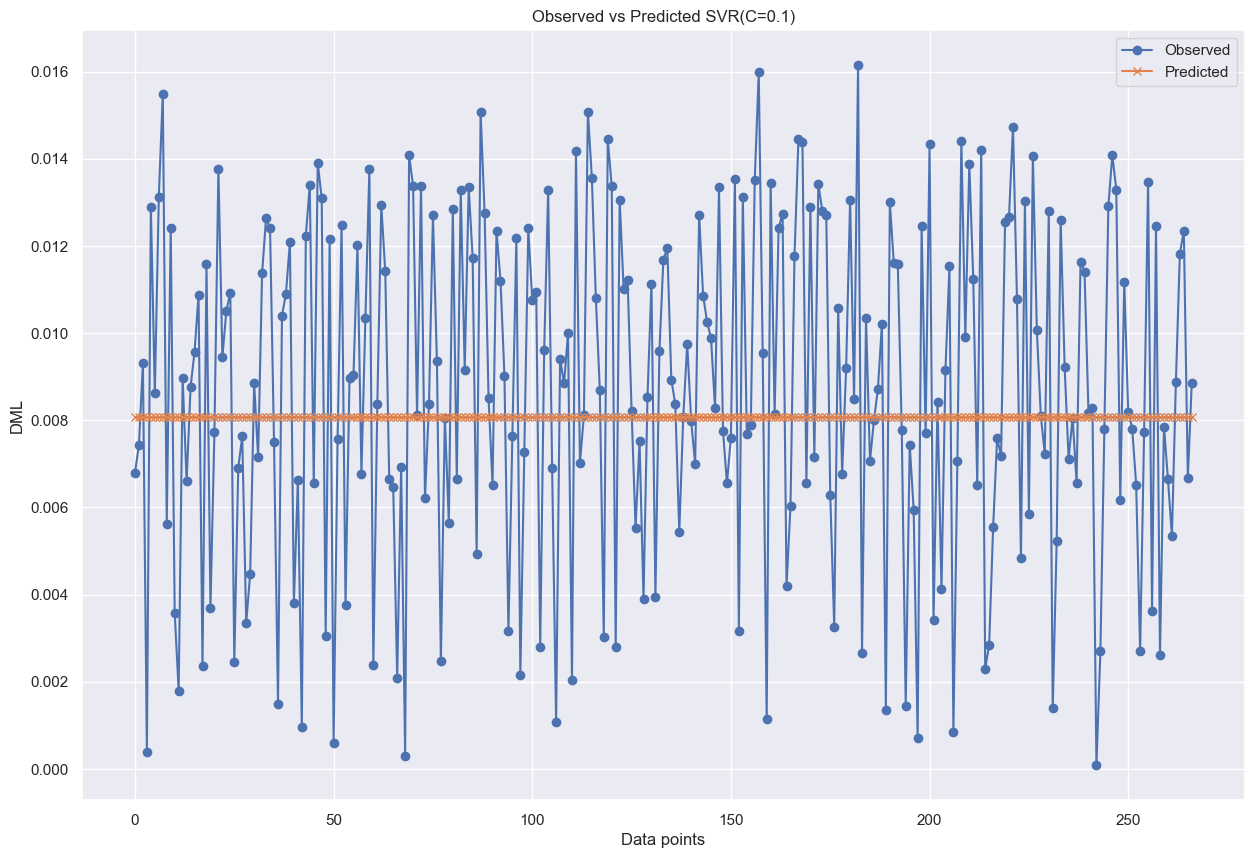

In [21]:
# training and fitting the data
# ----------------------------------------------------------
#   4. SVM CLASSIFIER ALGORITHM TRAINING
# ----------------------------------------------------------


# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': ['scale','auto'], 
              'kernel': ['rbf','poly', 'linear','sigmoid']}  
svm=SVR()
grid_search = GridSearchCV(svm, param_grid, cv=5) 
  
# fitting the model for grid search 
grid_search.fit(X_train, Y_train) 

print("Best parameters:", grid_search.best_params_) 
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_)) # Evaluate on the test set with the best parameters 

svm_best = SVR(**grid_search.best_params_) 
svm_best.fit(X_train, Y_train) 
y_test_pred = svm_best.predict(X_test) 

# Model evaluation
mse = mean_squared_error(Y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_test_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")


plot_obs_pred(Y_test, y_test_pred, svm_best, save=False)

In [22]:
model_filename = 'Model_developed_SVR.joblib'
dump(svm_best, model_filename)



['Model_developed_SVR.joblib']

In [23]:
# --------------------------------------------------------------------------------------------------------------------------------------------------------
# 
#       ENDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD 
#         ENDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD 
#           ENDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD 
#               ENDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD 
# ------------------------------------------------------------------------------------------------------------------------------------------------------------
